## Problem Satement::

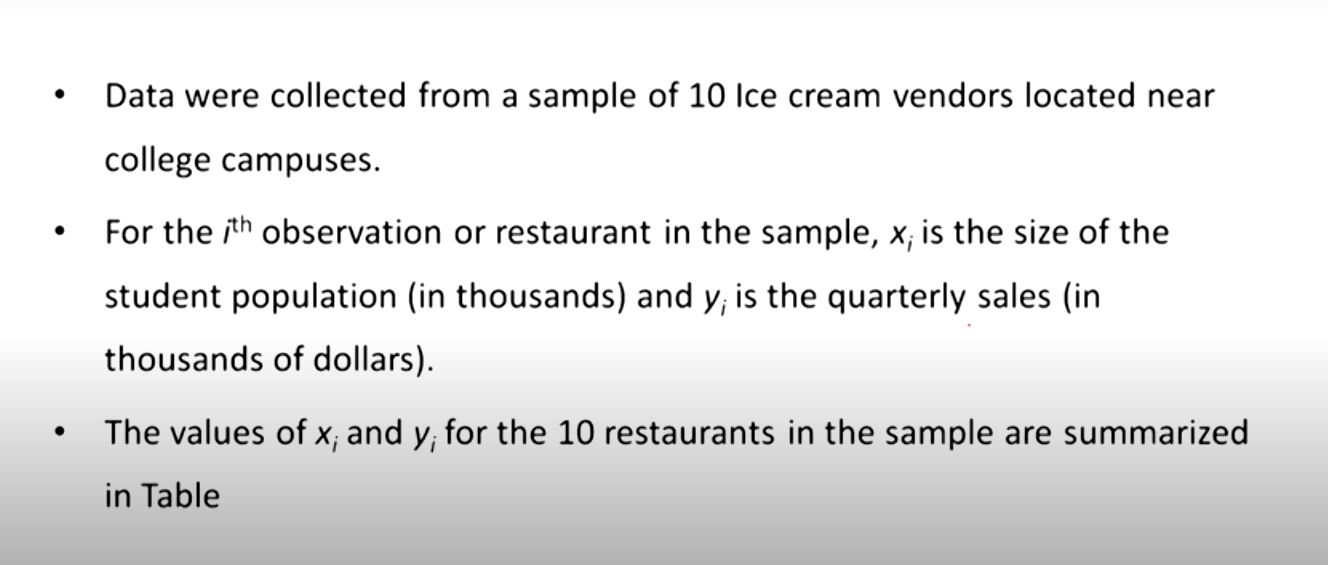

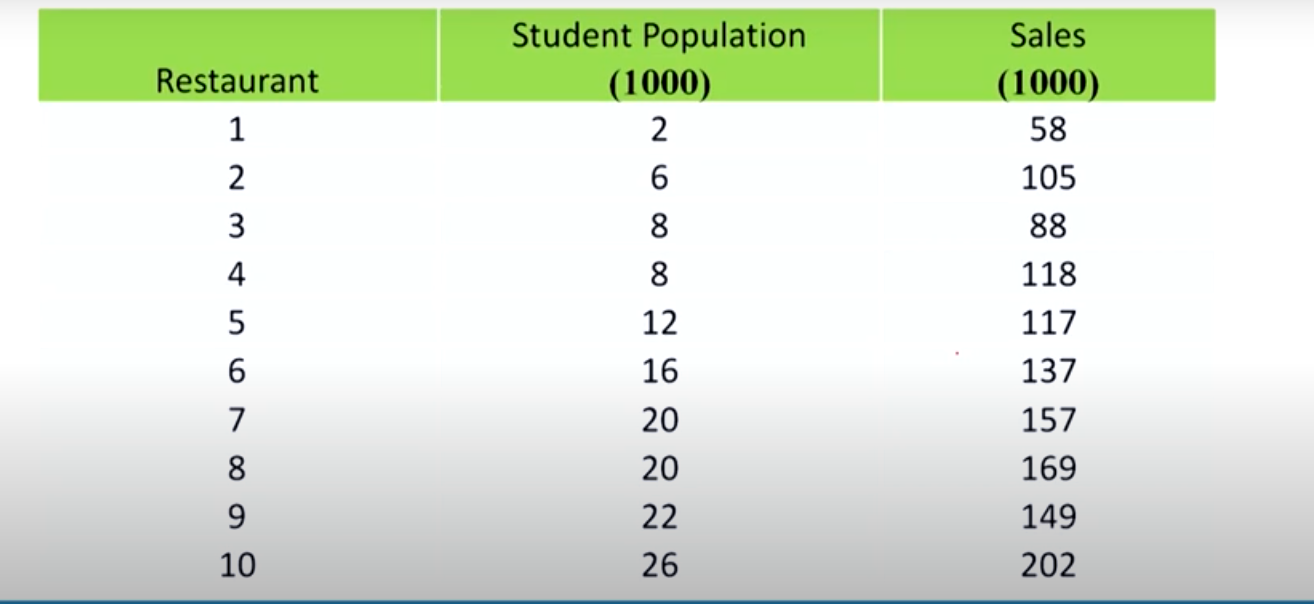

# Solution :: Finding the required Regression Line

# METHOD-1

In [1]:
import pandas as pd

In [2]:
## We are fetching the data from excel file using pandas library
data =pd .read_excel('/home/ashish/projects/LinearRegression4_ICE_CREAM_Vendor/lrm.xlsx')
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


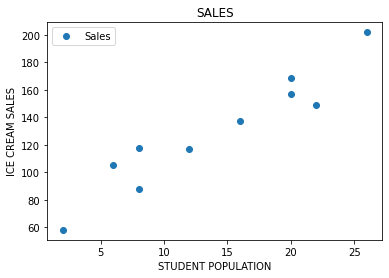

In [6]:
## plotting scatter plot for student population vs Sales using matplotlib library
import matplotlib.pyplot as plt
data.plot('Student_Population','Sales',style='o')  ## for plotting the scatteer plot
plt.xlabel('STUDENT POPULATION')
plt.ylabel('ICE CREAM SALES')
plt.title('SALES')
plt.show()

In [18]:
## Finding the Regression Equation
import statsmodels.api as sm  ## for the method add_constant()

##import statsmodels.formula.api as sm ##for the method OLS()

st_pop = data['Student_Population']
sales = data['Sales']
st_pop = sm.add_constant(st_pop)
model1 = sm.OLS(sales,st_pop)
result = model1.fit()
result.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           2.55e-05
Time:                        12:38:41   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## So the Regression Equation is ---> 
        sales = 60 + 5*Student_Population

# Method-2:: 

In [19]:
from sklearn.linear_model import LinearRegression

In [23]:
x = data['Student_Population'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [24]:
regression = LinearRegression()
regression.fit(x,y)

LinearRegression()

In [26]:
print("Intercept = ",regression.intercept_[0])
print("Coefficent = ",regression.coef_[0][0])

Intercept =  60.0
Coefficent =  5.0


## So the Regression Equation is ---> 
        Sales = 60 + 5*Student_Population

/home/ashish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


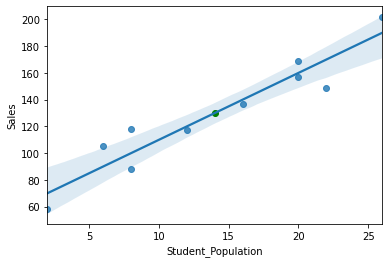

In [30]:
## Regression plot pasing througgh mean of sales and student population
import seaborn as sns ## for the regplot() method
import numpy as np
x = data['Student_Population']
y = data['Sales']
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color="green")

## Code for prediction interval

NOTE ::


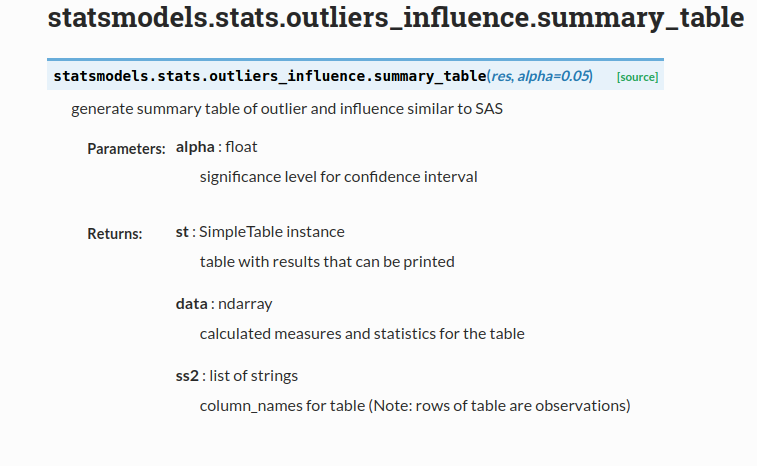

In [38]:
from statsmodels.stats.outliers_influence import summary_table

print(summary_table(result,alpha=0.05))
st,data1,ss2 = summary_table(result,alpha=0.05)
st              ## Simple Table instance  ---> table with results that can be printed

(<class 'statsmodels.iolib.table.SimpleTable'>, array([[ 1.00000000e+00,  5.80000000e+01,  7.00000000e+01,
         8.22258569e+00,  5.10386834e+01,  8.89613166e+01,
         3.28983415e+01,  1.07101658e+02, -1.20000000e+01,
         1.11193113e+01, -1.07920353e+00,  3.18447433e-01],
       [ 2.00000000e+00,  1.05000000e+02,  9.00000000e+01,
         6.37764030e+00,  7.52931351e+01,  1.04706865e+02,
         5.48817226e+01,  1.25118277e+02,  1.50000000e+01,
         1.22709292e+01,  1.22240131e+00,  2.01819329e-01],
       [ 3.00000000e+00,  8.80000000e+01,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02, -1.20000000e+01,
         1.26492498e+01, -9.48672859e-01,  8.78768540e-02],
       [ 4.00000000e+00,  1.18000000e+02,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02,  1.80000000e+01,
         1.26492498e+01,  1.42300929e+00,  1.97722921e-01],
    

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,58.0,69.99999999999994,8.222585693865266,51.0386833892804,88.96131661071948,32.89834154784004,107.10165845215985,-11.999999999999943,11.119311332409136,-1.0792035263032782,0.3184474325136633
2.0,105.0,89.99999999999996,6.377640298311584,75.29313510033799,104.70686489966192,54.88172260110567,125.11827739889424,15.000000000000043,12.270929232350422,1.2224013125635869,0.20181932943876033
3.0,88.0,99.99999999999996,5.589854995725687,87.10977126561957,112.89022873438034,65.60291394444249,134.39708605555742,-11.999999999999957,12.649249824663935,-0.9486728593660908,0.08787685396914878
4.0,118.0,99.99999999999996,5.589854995725687,87.10977126561957,112.89022873438034,65.60291394444249,134.39708605555742,18.000000000000043,12.649249824663935,1.4230092890491446,0.1977229214305871
5.0,117.0,119.99999999999997,4.524580752502433,109.56629807543696,130.433701924563,86.44610800310326,153.55389199689668,-2.9999999999999716,13.068212158290226,-0.2295646844160567,0.0031586717422392115
6.0,137.0,139.99999999999997,4.524580752502434,129.56629807543695,150.433701924563,106.44610800310325,173.5538919968967,-2.9999999999999716,13.068212158290226,-0.2295646844160567,0.0031586717422392124
7.0,157.0,160.0,5.589854995725688,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,-3.0,12.649249824663935,-0.23716821484152356,0.005492303373071841
8.0,169.0,160.0,5.589854995725688,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,9.0,12.649249824663935,0.7115046445245706,0.049430730357646564
9.0,149.0,170.0,6.377640298311584,155.29313510033802,184.70686489966198,134.8817226011057,205.1182773988943,-21.0,12.270929232350422,-1.7113618375890167,0.39556588569996803


In [36]:
data1     ## ndarray ---> calculated measures and statistics for the table

array([[ 1.00000000e+00,  5.80000000e+01,  7.00000000e+01,
         8.22258569e+00,  5.10386834e+01,  8.89613166e+01,
         3.28983415e+01,  1.07101658e+02, -1.20000000e+01,
         1.11193113e+01, -1.07920353e+00,  3.18447433e-01],
       [ 2.00000000e+00,  1.05000000e+02,  9.00000000e+01,
         6.37764030e+00,  7.52931351e+01,  1.04706865e+02,
         5.48817226e+01,  1.25118277e+02,  1.50000000e+01,
         1.22709292e+01,  1.22240131e+00,  2.01819329e-01],
       [ 3.00000000e+00,  8.80000000e+01,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02, -1.20000000e+01,
         1.26492498e+01, -9.48672859e-01,  8.78768540e-02],
       [ 4.00000000e+00,  1.18000000e+02,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02,  1.80000000e+01,
         1.26492498e+01,  1.42300929e+00,  1.97722921e-01],
       [ 5.00000000e+00,  1.17000000e+02,  1.2000000

In [42]:
ss2                  ## list of strings ---> column names for table

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [49]:
## fittedvalues variable stores the column predicted from the simple Table instance(st)
fittedvalues = data1[:,2]
## predict_me_se variable stores the column std error mean predicted from the simple Table instance(st)
predict_me_se = data1[:,3]

predict_mean_ci_low,predict_mean_ci_upp = data1[:,4:6].T   ##The T attribute is the transpose of the array,
print("\n\n\nCONFINDENCE INTERVAL LOWER LIMIT AND UPPER LIMIT FOR THE MEAN")
print(predict_mean_ci_low)
print(predict_mean_ci_upp)

print("\n\n\nCONFINDENCE INTERVAL LOWER LIMIT AND UPPER LIMIT FOR THE PREDICTED VALUE")
predict_ci_low,predict_ci_upp = data1[:,6:8].T
print(predict_ci_low)
print(predict_ci_upp)




CONFINDENCE INTERVAL LOWER LIMIT AND UPPER LIMIT FOR THE MEAN
[ 51.03868339  75.2931351   87.10977127  87.10977127 109.56629808
 129.56629808 147.10977127 147.10977127 155.2931351  171.03868339]
[ 88.96131661 104.7068649  112.89022873 112.89022873 130.43370192
 150.43370192 172.89022873 172.89022873 184.7068649  208.96131661]



CONFINDENCE INTERVAL LOWER LIMIT AND UPPER LIMIT FOR THE PREDICTED VALUE
[ 32.89834155  54.8817226   65.60291394  65.60291394  86.446108
 106.446108   125.60291394 125.60291394 134.8817226  152.89834155]
[107.10165845 125.1182774  134.39708606 134.39708606 153.553892
 173.553892   194.39708606 194.39708606 205.1182774  227.10165845]


## Plotting the scatter plot for confidence interval and prediction interval

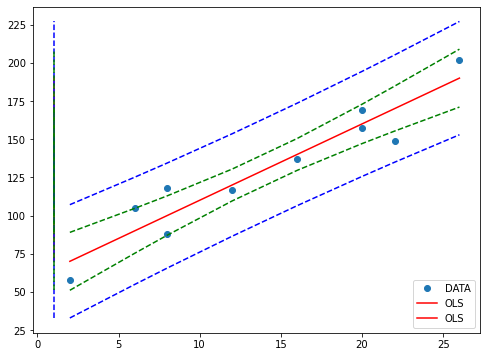

In [52]:
import matplotlib.pyplot as plt
import statsmodels.api as s
x = data['Student_Population']
y = data['Sales']

X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))   ##figsize ----> Width, height in inches.
ax.plot(x,y,'o',label="DATA")
ax.plot(X,fittedvalues,'r-',label='OLS')    ## r- = fmt = '[marker][line][color]'
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()